In [1]:
import numpy as np
import matplotlib as mp
%matplotlib inline

Пусть функция $p(i, N)$ показывает вероятность того, что находящийся в позиции $i \geq 0$ пьяница через $N \geq 0$ шагов останется жив.
Функцию $p$ можно вычислить рекурсивно по следующей формуле:
$$ p(i,N) = \frac{1}{3} p(i-1,N-1) + \frac{2}{3} p(i+1,N-1) $$
То есть, пьяница совершает либо шаг вперед с вероятностью $\frac{1}{3}$, либо с вероятностью $\frac{2}{3}$ шаг назад и продолжает ходить, пока у него не кончатся ходы, или пока он не упадёт. Эти дополнительные условия можно записать как:
$$ \forall N\geq0: p(i,N) = 0 \text{, пьяница упал} $$
$$ \forall i>0: p(i,0) = 1 \text{, кончились ходы, пьяница жив} $$

Но рекурсия будет работать очень медленно, потому что большое количество раз будет вычислять одни и те же значения, поэтому можно завести массив `cache`, в котором мы будем хранить уже высчитанные значения $p(i,n)$.

In [2]:
cache = np.empty([1000,1000]) - 1 # инициализируем массив -1-ми, которые означают,
                                  # что данное значение функции вычислено не было
cache[:,0] = np.ones(1000)  # кончились ходы, пьяница жив
cache[0,:] = np.zeros(1000) # пьяница упал

В результате, `cache[i,N]` будет равна значению функции $p(i,N)$.

In [3]:
def drunkard_alive(n):
    def P(i, N):
        if cache[i, N] != -1: 
            return cache[i,N]
        cache[i,N] = P(i-1,N-1)*1/3 + P(i+1,N-1)*2/3
        return cache[i,N]   
    return P(2,n)

Вероятность того, что пьяница не свалится через 5 ходов:

In [4]:
drunkard_alive(5)

0.83950617283950613

График функции `drunkard_alive` для $N$ от 1 до 50. 

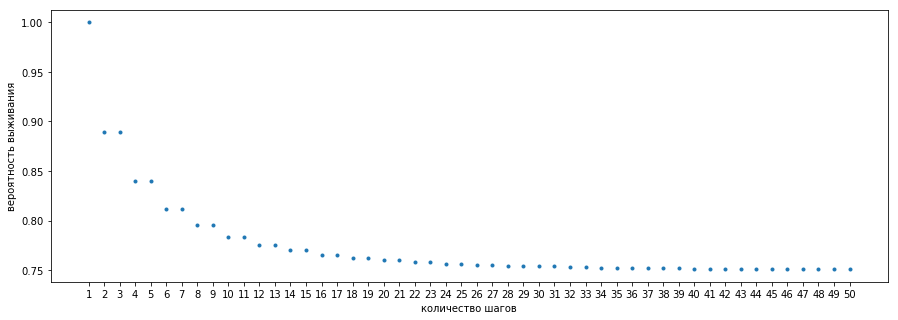

In [5]:
n = range(1,51,1)
for i in n:
    drunkard_alive(i)
    
mp.rcParams['figure.figsize'] = (15,5)
mp.pyplot.xticks(n)
mp.pyplot.xlabel('количество шагов')
mp.pyplot.ylabel('вероятность выживания')
mp.pyplot.plot(n, cache[2,1:51], '.')